In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv(r"D:\Hackthon\ratings.csv")
df1 = pd.read_csv(r"D:\Hackthon\movies.csv")
df2 = pd.read_csv(r"D:\Hackthon\tags.csv")
df3 = pd.read_csv(r"D:\Hackthon\links.csv")

In [38]:
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [17]:
df1.shape

(9742, 3)

In [18]:
df.shape

(100836, 4)

In [21]:
df['userId'].nunique()

610

In [22]:
merge = pd.merge(df, df1, on = "movieId")

In [29]:
groupby = merge.groupby("title")["rating"].count()
maxratingmovie = groupby.idxmax()
maxratingmovie

'Forrest Gump (1994)'

In [32]:
matrixmovie = df1[df1['title'] == 'Matrix, The (1999)']['movieId'].values[0]
matrixtag = df2[df2['movieId'] == matrixmovie]['tag']
tags = matrixtag.unique()            
tags

array(['martial arts', 'sci-fi', 'alternate universe', 'philosophy',
       'post apocalyptic'], dtype=object)

In [ ]:
movieid = df1[df1['title'] == 'Terminator 2: Judgement Day (1991)']['movieId'].values[0]
movierating = df[df['movieId'] == movieid]['rating']
avg = movierating.mean()
avg

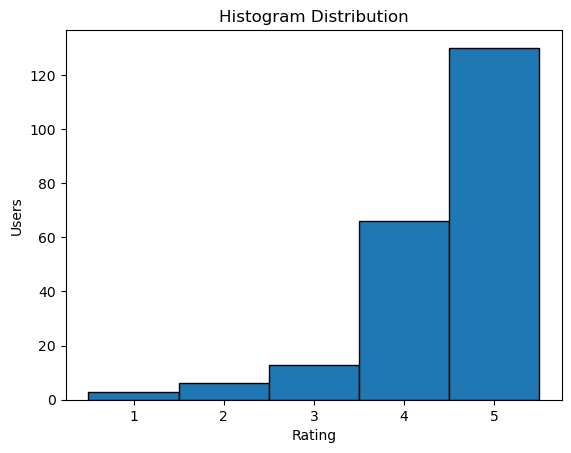

In [45]:
fightclub = df1[df1['title'] == 'Fight Club (1999)']['movieId'].values[0]
fightclubratings = df[df['movieId'] == fightclub]['rating']
plt.hist(fightclubratings, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black')
plt.title('Histogram Distribution')
plt.xlabel('Rating')
plt.ylabel('Users')
plt.show()

## Left Skewed

In [47]:
group_ratings = df.groupby('movieId')['rating'].agg(['count', 'mean'])
merging = pd.merge(df1, group_ratings, on='movieId', how='inner')
filtered = merging[merging['count'] > 50]
hit = filtered[filtered['mean'] == filtered['mean'].max()]
print(hit[['title', 'mean']])

                                title      mean
277  Shawshank Redemption, The (1994)  4.429022


In [54]:
groupby = df.groupby('movieId')['rating'].agg(['count', 'mean'])
merge = pd.merge(df1, groupby, on='movieId', how='inner')
filtered = merge[merge['count'] > 50]
topmovies = filtered.nlargest(5, 'count')
print(topmovies[['title', 'count']])

                                 title  count
314                Forrest Gump (1994)    329
277   Shawshank Redemption, The (1994)    317
257                Pulp Fiction (1994)    307
510   Silence of the Lambs, The (1991)    279
1938                Matrix, The (1999)    278


In [56]:
groupby = df.groupby('movieId')['rating'].agg(['count', 'mean'])
merge = pd.merge(df1, groupby, on='movieId', how='inner')
filter = merge[merge['count'] > 50]
scifi = filter[filter['genres'].str.contains('Sci-Fi')]
thirdpop = scifi_movies.nlargest(3, 'count').iloc[-1]
print(thirdpop[['title', 'count']])

title    Jurassic Park (1993)
count                     238
Name: 418, dtype: object


In [49]:
merge = pd.merge(df1, df, on='movieId', how='inner')
avg = merge.groupby('movieId')['rating'].mean()
IMDB = avg.idxmax()
IMDB

53

In [60]:
merged = pd.merge(df1, df, on='movieId', how='inner')
avg_rating = merged.groupby('movieId')['rating'].mean()

high_rated_scifi_movie_id = (
    merged[merged['genres'].str.contains('Sci-Fi')]
    .groupby('movieId')['rating']
    .mean()
    .idxmax()
)

high_rated_scifi_movie_id

3687